# Challenge 3

In this challenge we will work on the `Orders.csv` data set in the previous [Subsetting and Descriptive Stats lab](../../lab-subsetting-and-descriptive-stats/your-code/main.ipynb). In your work you will apply the thinking process and workflow we showed you in Challenge 2.

You are serving as a Business Intelligence Analyst at the headquarter of an international fashion goods chain store. Your boss today asked you to do two things for her:

**First, identify two groups of customers from the data set.** The first group is **VIP Customers** whose **aggregated expenses** at your global chain stores are **above the 95th percentile** (aka. 0.95 quantile). The second group is **Preferred Customers** whose **aggregated expenses** are **between the 75th and 95th percentile**.

**Second, identify which country has the most of your VIP customers, and which country has the most of your VIP+Preferred Customers combined.**

# Q1: How to identify VIP & Preferred Customers?

We start by importing all the required libraries:

In [12]:
import numpy as np
import pandas as pd

Next, import `Orders.csv` from the "subsetting" lab folder into a dataframe variable called `orders`. Print the head of `orders` to overview the data:

In [13]:
orders = pd.read_csv("../../lab-subsetting-and-descriptive-stats/your-code/Orders.zip")
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


---

"Identify VIP and Preferred Customers" is the non-technical goal of your boss. You need to translate that goal into technical languages that data analysts use:

## How to label customers whose aggregated `amount_spent` is in a given quantile range?


We break down the main problem into several sub problems:

#### Sub Problem 1: How to aggregate the  `amount_spent` for unique customers?

#### Sub Problem 2: How to select customers whose aggregated `amount_spent` is in a given quantile range?

#### Sub Problem 3: How to label selected customers as "VIP" or "Preferred"?

*Note: If you want to break down the main problem in a different way, please feel free to revise the sub problems above.*

Now in the workspace below, tackle each of the sub problems using the iterative problem solving workflow. Insert cells as necessary to write your codes and explain your steps.

### Sub Problem 1: finding unique customers...

In [15]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


Generamos otro dataframe que contenga las columnas `CustomerID`y `amount_spent`

In [60]:
amount_spent_and_customer = pd.DataFrame([orders['CustomerID'], orders['amount_spent']]).T
amount_spent_and_customer.head()

,CustomerID,amount_spent
0,17850.0,15.30
1,17850.0,20.34
2,17850.0,22.00
3,17850.0,20.34
4,17850.0,20.34


Obtenemos los valores únicos de `CustomerID`

In [61]:
customers = amount_spent_and_customer['CustomerID'].unique()
len(customers)

4339

### Continue... Sub Problem 1: aggregating the amount_spent for unique customers...

Ahora lo que vamos a hacer es agrupar los datos por `CustomerID` y después vamos a sumar los valores de 
`amount_spent`

In [228]:
amount_spent_by_customer = amount_spent_and_customer.groupby(['CustomerID']).sum()
amount_spent_by_customer.head()

,amount_spent
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [229]:
amount_spent_by_customer.sort_values(by='amount_spent', ascending=False).head()

,amount_spent
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06


### Sub Problem 2: Selecting customers whose aggregated `amount_spent` is in a given quantile range?

Vamos a probar por curiosidad los valores de los quantiles pedidos


In [230]:
VIP_amount = amount_spent_by_customer['amount_spent'].quantile(0.95)
VIP_amount

5840.181999999983

Obtenemos los clientes que superan el quantil 95 para obtener los clientes VIP

In [231]:
VIP_customers = amount_spent_by_customer[amount_spent_by_customer['amount_spent'] > VIP_amount]
VIP_customers.head()

,amount_spent
CustomerID,
12346.0,77183.60
12357.0,6207.67
12359.0,6372.58
12409.0,11072.67
12415.0,124914.53


### Extraemos los valores de CustomerID 

Este ha sido uno de los momentos más tensos de este lab... porque CustomerId ya no es una columna... se ha convertido en índice @!^*ç

In [232]:
VIP = list(VIP_customers.index)

### Repetimos el mismo proceso con clientes de tipo Preferred

In [233]:
Preferred_amount = amount_spent_by_customer['amount_spent'].quantile(0.75)
Preferred_amount

1661.6400000000003

In [234]:
preferred_customers = amount_spent_by_customer[(amount_spent_by_customer['amount_spent'] > Preferred_amount) & \
                                               (amount_spent_by_customer['amount_spent'] < VIP_amount)]
preferred_customers.head()

,amount_spent
CustomerID,
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12352.0,2506.04
12356.0,2811.43


In [235]:
Preferred = list(preferred_customers.index)

#### Sub Problem 3: Labeling (or trying to labeling) selected customers as "VIP" or "Preferred"?

Todo el trabajo anterior viene definido por este paso.
La forma más *"¿fácil?"* era generar una nueva columna en orders que fuera `customers_type` y tendrían un valor u otro en función del valor que tuviese `CustomerID` porque pertenecería a uno de los dataframes creados y no al otro. El resto serían normales.  

#### *Nota para el futuro:*  
Cuando trabajamos con np.where() tenemos que tener en cuenta que sólo acepta 3 parámetros:  
* Condición
* Valor en caso de cumplir la condición
* Valor en caso de NO cumplir la condición  


Por tanto, si queremos encadenar condiciones tenemos que hacer igual que con los bloques `if`, encadernar uno dentro del otro, SIN olvidarnos del `if`





In [236]:
orders['customers_type'] = np.where(orders['CustomerID'].isin(VIP), 'VIP', \
                                   np.where(orders['CustomerID'].isin(Preferred) , 'Preferred','Normal'))

orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,customers_type
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Preferred
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Preferred
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Preferred
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Preferred
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Preferred


Now we'll leave it to you to solve Q2 & Q3, which you can leverage from your solution for Q1:

# Q2: How to identify which country has the most VIP Customers?

# Q3: How to identify which country has the most VIP+Preferred Customers combined?

Provide your solution for Q2 below:

### Q2: How to identify which country has the most VIP Customers?

Primero intentamos obtener la lista de los países con clientes VIP

In [237]:
vip_df = orders[orders['customers_type'] == 'VIP']
vip_countries = list(vip_df['Country'].unique())
vip_countries

['France',
 'United Kingdom',
 'Australia',
 'Norway',
 'EIRE',
 'Spain',
 'Germany',
 'Portugal',
 'Japan',
 'Sweden',
 'Netherlands',
 'Cyprus',
 'Switzerland',
 'Singapore',
 'Belgium',
 'Finland',
 'Channel Islands',
 'Denmark']

Primero intentamos sacar los clientes por país con el ejemplo de Francia para, a partir  de él, obtener una función

In [238]:
france_vip_costumers = list(vip_df[vip_df['Country'] == 'France']['CustomerID'].unique())
france_vip_costumers

[12583, 12682, 12567, 12681, 12683, 12731, 12678, 12637, 12536]

La función siguiente permite obtener un diccionario cuyas claves son los países de clientes VIP y sus valores la lista de clientes.  

#### Parámetros de entrada:  
* Dataframe
* Columna que queremos filtrar
* Lista de valores condicionantes
* Columna cuyos valores queremos obtener

#### Resultado:  
* Diccionario cuyas claves son los elementos de la lista `condition` y sus valores los correspondientes a esa condición en la columna `col2`

In [239]:
def get_values_coditioned_by_a_value(df, col, condition, col2):
    result = {}
    for item in condition:
        result[item] = list(df[df[col] == item][col2].unique())
    return result

In [240]:
vip_result = get_values_coditioned_by_a_value(vip_df, 'Country', vip_countries, 'CustomerID')
vip_result

{'France': [12583, 12682, 12567, 12681, 12683, 12731, 12678, 12637, 12536],
 'United Kingdom': [15311,
  16029,
  17511,
  13408,
  13767,
  15513,
  13694,
  14849,
  16210,
  12748,
  17841,
  13093,
  12921,
  13777,
  18229,
  14606,
  13576,
  13090,
  15694,
  17017,
  15601,
  13418,
  14060,
  17381,
  17581,
  15061,
  15640,
  14031,
  12971,
  13798,
  17396,
  14680,
  16013,
  17949,
  15769,
  13081,
  17243,
  15465,
  13089,
  16033,
  18055,
  18109,
  16839,
  16814,
  16353,
  14527,
  15023,
  16422,
  15502,
  17677,
  17428,
  15039,
  15078,
  14667,
  15194,
  17450,
  17735,
  15838,
  14733,
  13488,
  17675,
  18102,
  13078,
  16779,
  14796,
  13199,
  17706,
  16525,
  16558,
  15498,
  14051,
  16713,
  13113,
  15005,
  14866,
  17340,
  18092,
  15358,
  13319,
  13854,
  17857,
  15856,
  13102,
  13969,
  16656,
  14952,
  12989,
  17865,
  16873,
  14062,
  16923,
  13668,
  15044,
  14505,
  13225,
  13209,
  17338,
  15159,
  13324,
  14961,
  1405

A la vista de los resultados, Reino Unido es quien más clientes VIP tiene

#### Q3: How to identify which country has the most VIP+Preferred Customers combined?

Repetimos el proceso anterior en la primera iteración

In [241]:
preferred_df = orders[orders['customers_type'] == 'Preferred']
preferred_countries = list(preferred_df['Country'].unique())
preferred_countries

['United Kingdom',
 'Germany',
 'Switzerland',
 'Poland',
 'Belgium',
 'Iceland',
 'Japan',
 'Denmark',
 'Cyprus',
 'Finland',
 'Austria',
 'Portugal',
 'France',
 'EIRE',
 'Sweden',
 'Spain',
 'Italy',
 'Australia',
 'Greece',
 'Lebanon',
 'Channel Islands',
 'Israel',
 'Norway',
 'Malta',
 'Canada']

In [242]:
sorted(vip_countries) == sorted(preferred_countries) 

False

Tras una pequeña comprobación observamos que no son los mismos países

In [243]:
sorted(preferred_countries) == sorted(list(orders['Country']))

False

In [244]:
pref_result = get_values_coditioned_by_a_value(preferred_df, 'Country', preferred_countries, 'CustomerID')
pref_result

{'United Kingdom': [17850,
  13047,
  15291,
  14688,
  17809,
  16098,
  17924,
  13448,
  16218,
  14307,
  17920,
  13758,
  17377,
  14001,
  15485,
  18144,
  16456,
  17346,
  17873,
  13468,
  16928,
  14696,
  17690,
  17069,
  15235,
  15752,
  13941,
  14135,
  14388,
  18041,
  15955,
  14390,
  15260,
  13305,
  15544,
  15738,
  15827,
  14180,
  14466,
  16186,
  17685,
  17567,
  17838,
  17228,
  17659,
  15299,
  17757,
  16754,
  14395,
  15093,
  16150,
  12841,
  16905,
  13013,
  14210,
  16477,
  17787,
  17954,
  17819,
  15373,
  17238,
  16455,
  13069,
  16241,
  14800,
  15708,
  16168,
  16931,
  15351,
  13269,
  14810,
  18118,
  13831,
  16983,
  17059,
  16327,
  17211,
  15570,
  15808,
  17858,
  16393,
  17863,
  17402,
  15867,
  14506,
  15555,
  16143,
  12747,
  17965,
  13174,
  16161,
  18219,
  16638,
  13094,
  14189,
  16719,
  15301,
  14825,
  17596,
  14085,
  16919,
  16722,
  16710,
  15984,
  17682,
  16550,
  17068,
  15356,
  17191,
 

La comprobación definitiva sería sumar los valores contenidos en las claves, en caso de ser coincidentes, para ver cuál es el resultado. Pero realmente se ve que vuelve a ganar Reino Unido como ya hizo con Gibraltar :P

No contentas con esta respuesta pasamos a...
### La 2ª iteración para llegar al resultado

Generamos un nuevo diccionario con países que tengan VIP y/o Preferred

In [245]:
vip_plus_preferred_result = {k: vip_result[k] + pref_result[k]  for k in pref_result.keys() & vip_result.keys()}

Y hacemos más comprobaciones para ver si vamos bien. En este caso, escogemos Portugal

In [246]:
vip_plus_preferred_result['Portugal']

[12766, 12757, 12782, 12356, 12758, 12783, 12762]

In [247]:
vip_result['Portugal']

[12766, 12757]

In [248]:
pref_result['Portugal']

[12782, 12356, 12758, 12783, 12762]

Y no obtenemos el resultado pedido, porque tiene que ser el valor combinado de ambos tipos de clientes...  
### La 3ª iteración para llegar al resultado


Así que, comparamos los arrays de países con clientes  vip y clientes preferred. Y obtenemos un único array con los países que estén presentes tanto en países Vip y Preferred

In [249]:
combined = list(set(preferred_countries).intersection(vip_countries))
combined

['France',
 'Australia',
 'Japan',
 'Belgium',
 'Channel Islands',
 'Norway',
 'Germany',
 'Portugal',
 'Switzerland',
 'Finland',
 'EIRE',
 'Cyprus',
 'Sweden',
 'Spain',
 'Denmark',
 'United Kingdom']

Y obtenemos los valores de los clientes en los dataframes correspondientes a clientes VIP y preferred

In [250]:
vip_combined = get_values_coditioned_by_a_value(vip_df, 'Country', combined, 'CustomerID')
vip_combined

{'France': [12583, 12682, 12567, 12681, 12683, 12731, 12678, 12637, 12536],
 'Australia': [12431, 12415],
 'Japan': [12753, 12798],
 'Belgium': [12431],
 'Channel Islands': [14936],
 'Norway': [12433],
 'Germany': [12472,
  12709,
  12621,
  12471,
  12476,
  12705,
  12474,
  12626,
  12477,
  12590],
 'Portugal': [12766, 12757],
 'Switzerland': [12451, 12409, 12357],
 'Finland': [12428],
 'EIRE': [14911, 14156],
 'Cyprus': [12359],
 'Sweden': [17404],
 'Spain': [12557, 12540],
 'Denmark': [12435],
 'United Kingdom': [15311,
  16029,
  17511,
  13408,
  13767,
  15513,
  13694,
  14849,
  16210,
  12748,
  17841,
  13093,
  12921,
  13777,
  18229,
  14606,
  13576,
  13090,
  15694,
  17017,
  15601,
  13418,
  14060,
  17381,
  17581,
  15061,
  15640,
  14031,
  12971,
  13798,
  17396,
  14680,
  16013,
  17949,
  15769,
  13081,
  17243,
  15465,
  13089,
  16033,
  18055,
  18109,
  16839,
  16814,
  16353,
  14527,
  15023,
  16422,
  15502,
  17677,
  17428,
  15039,
  15078,


In [251]:
pref_combined = get_values_coditioned_by_a_value(preferred_df, 'Country', combined, 'CustomerID')
pref_combined

{'France': [12726,
  12721,
  12643,
  12523,
  12437,
  12490,
  12553,
  12727,
  12714,
  12598,
  12669,
  12656,
  12670,
  12700,
  12684,
  14277,
  12674,
  12562,
  12615,
  12685],
 'Australia': [12388, 12424],
 'Japan': [12755, 12754],
 'Belgium': [12395,
  12417,
  12423,
  12383,
  12362,
  12407,
  12408,
  12876,
  12449,
  12380,
  12397],
 'Channel Islands': [14935, 14934, 14930],
 'Norway': [12352, 12432, 12444, 12438, 12381, 12752],
 'Germany': [12662,
  12600,
  12712,
  12647,
  12720,
  12708,
  12481,
  12668,
  12585,
  12530,
  12501,
  12480,
  12500,
  12524,
  12625,
  13815,
  12645,
  12528,
  12633,
  12520,
  12613,
  12619,
  12569,
  12473,
  12517,
  12635,
  12560,
  12627,
  12518],
 'Portugal': [12782, 12356, 12758, 12783, 12762],
 'Switzerland': [13520, 12456, 12457, 13505, 12378, 12371],
 'Finland': [12348, 12664, 12704, 12405],
 'EIRE': [14016],
 'Cyprus': [12370, 12455, 12457],
 'Sweden': [12483],
 'Spain': [12484, 12539, 12502, 12597, 12417, 1

In [252]:
combined_result = {k: vip_combined[k] + pref_combined[k]  for k in pref_combined.keys() & vip_combined.keys()}
combined_result

{'France': [12583,
  12682,
  12567,
  12681,
  12683,
  12731,
  12678,
  12637,
  12536,
  12726,
  12721,
  12643,
  12523,
  12437,
  12490,
  12553,
  12727,
  12714,
  12598,
  12669,
  12656,
  12670,
  12700,
  12684,
  14277,
  12674,
  12562,
  12615,
  12685],
 'Australia': [12431, 12415, 12388, 12424],
 'Japan': [12753, 12798, 12755, 12754],
 'Channel Islands': [14936, 14935, 14934, 14930],
 'Belgium': [12431,
  12395,
  12417,
  12423,
  12383,
  12362,
  12407,
  12408,
  12876,
  12449,
  12380,
  12397],
 'Norway': [12433, 12352, 12432, 12444, 12438, 12381, 12752],
 'Germany': [12472,
  12709,
  12621,
  12471,
  12476,
  12705,
  12474,
  12626,
  12477,
  12590,
  12662,
  12600,
  12712,
  12647,
  12720,
  12708,
  12481,
  12668,
  12585,
  12530,
  12501,
  12480,
  12500,
  12524,
  12625,
  13815,
  12645,
  12528,
  12633,
  12520,
  12613,
  12619,
  12569,
  12473,
  12517,
  12635,
  12560,
  12627,
  12518],
 'Portugal': [12766, 12757, 12782, 12356, 12758, 

Para hilar más fino, realizamos un diccionario con los países como claves y con el número de clientes por país como valores

In [253]:
number_of_clients = { k: len(combined_result[k]) for k in combined_result.keys()} 

In [254]:
number_of_clients

{'France': 29,
 'Australia': 4,
 'Japan': 4,
 'Channel Islands': 4,
 'Belgium': 12,
 'Norway': 7,
 'Germany': 39,
 'Portugal': 7,
 'Switzerland': 9,
 'Finland': 5,
 'EIRE': 3,
 'Cyprus': 4,
 'Sweden': 2,
 'Spain': 9,
 'Denmark': 3,
 'United Kingdom': 932}

Representamos el resultado :)

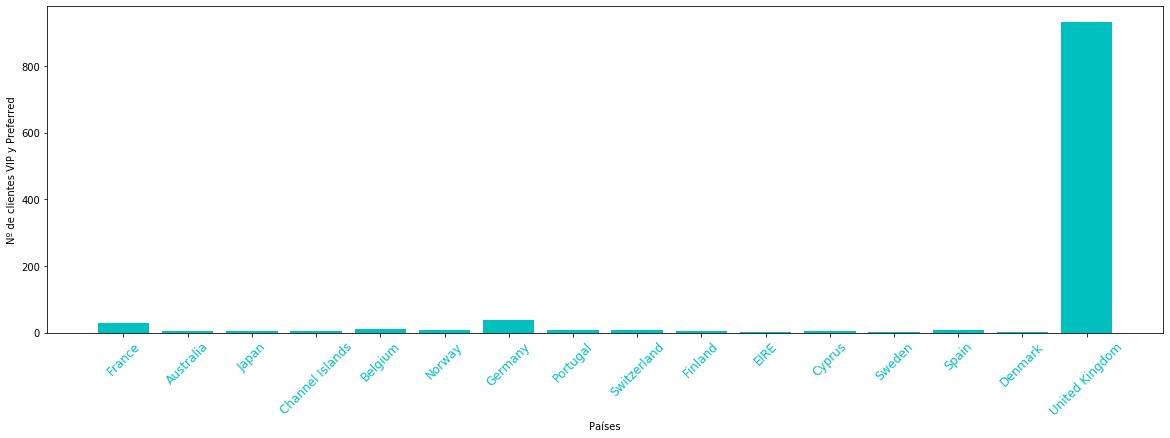

In [255]:
import matplotlib.pyplot as plt
x = list(number_of_clients.keys())
plt.figure(figsize=(20, 6))
plt.bar(x, number_of_clients.values(), color='c')
plt.xticks(x, size = 'large', color = 'c', rotation = 45)
plt.xlabel('Países')
plt.ylabel('Nº de clientes VIP y Preferred')
plt.show()

Ya podemos dar por terminado el Challenge-3

Fin del Jupyter Notebook